# Part 1: Preparing the Data

### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats

### Load the dataset

In [2]:
data = pd.read_csv('day.csv')

### Understand the Data

In [3]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# # Selecting only numerical columns for the correlation matrix
# numerical_data = data.select_dtypes(include=[np.number])

# # Checking the correlation matrix again
# plt.figure(figsize=(10, 6))
# sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')

# # Specifically checking the correlation with 'cnt'
# numerical_data.corr()['cnt'].sort_values(ascending=False)

#### Drop unnecessary columns

In [7]:
# Dropping the columns as they won't contribute to the model
data_cleaned = data.drop(columns=['instant', 'dteday', 'casual', 'registered'])

#### Convert categorical columns to dummy variables

In [8]:
data_cleaned = pd.get_dummies(data_cleaned, columns=['season', 'weathersit', 'mnth', 'weekday'], drop_first=True)

cnt           1.000000
atemp         0.630685
temp          0.627044
yr            0.569728
workingday    0.062542
holiday      -0.068764
hum          -0.098543
windspeed    -0.235132
Name: cnt, dtype: float64

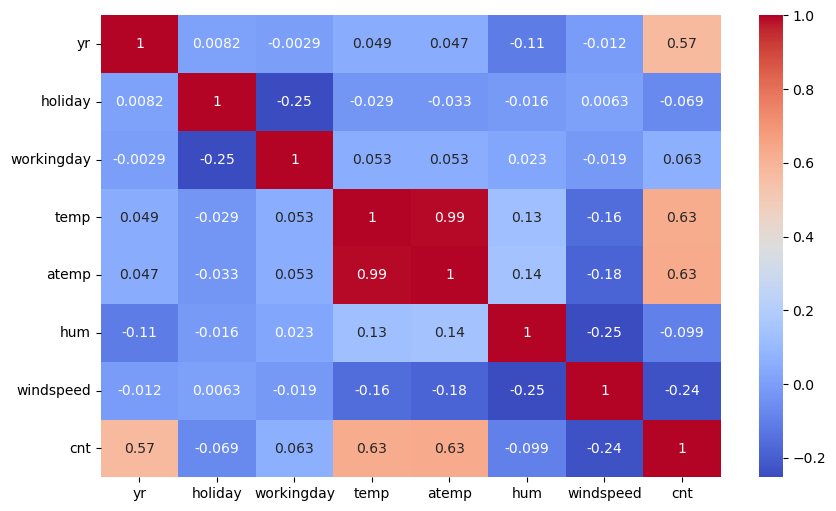

In [9]:
# Selecting only numerical columns for the correlation matrix
numerical_data_cleaned = data_cleaned.select_dtypes(include=[np.number])

# Checking the correlation matrix again
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_data_cleaned.corr(), annot=True, cmap='coolwarm')

# Specifically checking the correlation with 'cnt'
numerical_data_cleaned.corr()['cnt'].sort_values(ascending=False)

# Part 2: Model Building

#### Splitting Data into Train and Test Sets

In [10]:
# Defining independent variables (X) and target variable (y)
X = data_cleaned.drop(columns=['cnt'])
y = data_cleaned['cnt']

In [11]:
# Splitting dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Step 4: Building the Multiple Linear Regression Model

In [12]:
# Initializing and fitting the model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [13]:
# Predicting on the test set
y_pred = lm.predict(X_test)
y_pred

array([6152.04094187, 4298.86441544, 3711.72231323, 1741.54597833,
       7200.65632241, 5100.61716073, 2585.80447448, 2843.97629624,
       3616.19658357, 3559.60292557, 3132.17761643, 4937.87261809,
       2182.02795187, 4428.66749476, 4925.28721844, 3659.43126328,
       5671.68100001, 1397.50227778, 5978.46772261, 4244.32886756,
       3387.07997454, 4419.0128104 , 5225.35096592, 5633.21416362,
       4829.75995771, 5092.57450511, 3979.76958771,  815.98537177,
       4873.80199799, 1712.51848787, 3278.7043865 , 3924.83169193,
       1151.3702848 , 1629.27504706, 5615.98137846, 4806.97514334,
       2963.17989199, 3020.72660998,  633.36240385, 7409.45610249,
       1606.62479921, 5506.55914535, 4944.76224866, 6638.11712707,
       4433.98460879, 3855.7431449 , 6414.39421745, 5159.10641532,
       4477.56632687, 6598.2559953 , 4252.53880116, 4302.38561341,
       5487.64443984, 5058.91432861, 5224.86094433, 5601.04123482,
       4020.57040289, 6190.99480757, 4106.06586755, 4968.76092

#### Step 5: Model Evaluation

In [14]:
# R-squared score to evaluate performance
r2_score(y_test, y_pred)

0.8368179276158046

#### Step 6: Residual Analysis

In [15]:
# Calculate residuals
residuals = y_test - y_pred

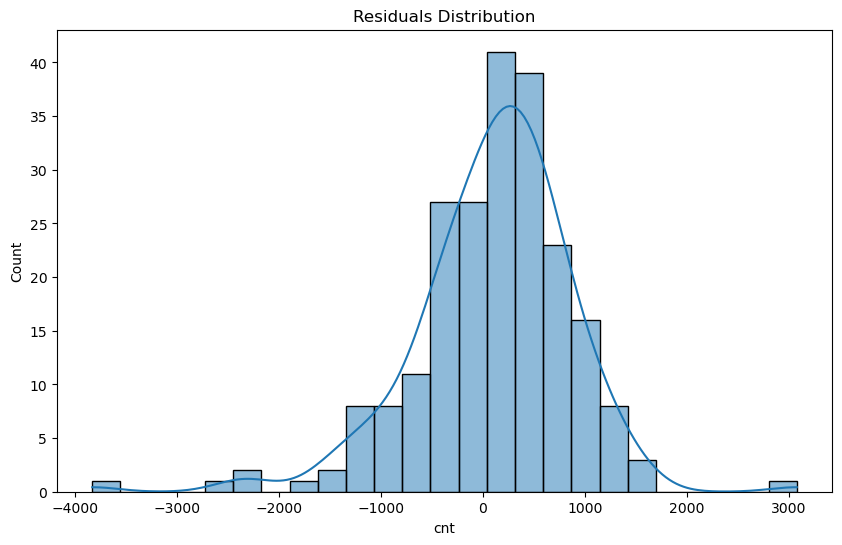

In [16]:
# Plotting the residuals to check distribution
plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()

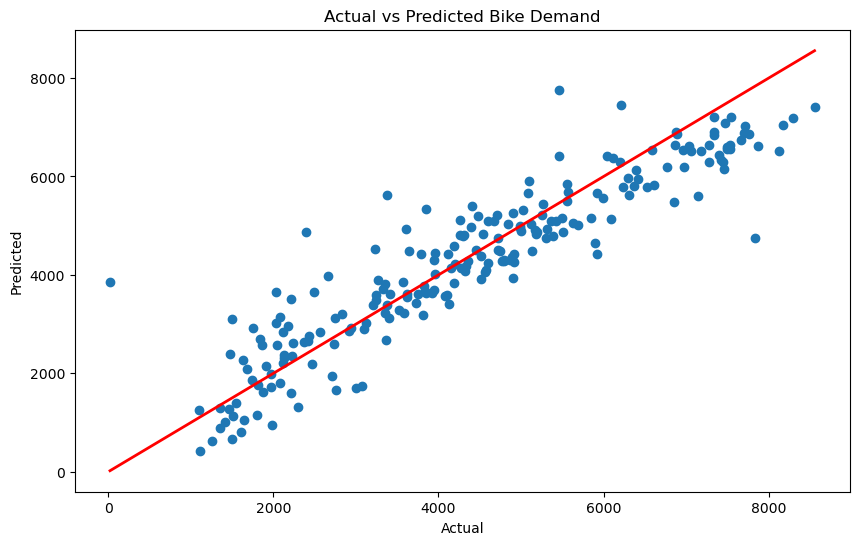

In [17]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Actual vs Predicted Bike Demand')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

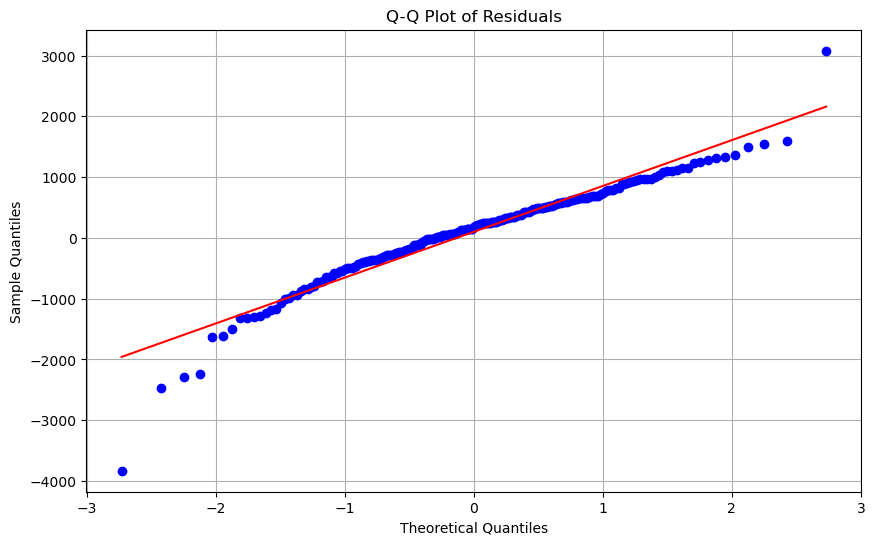

In [18]:
# Q-Q plot for residuals
plt.figure(figsize=(10,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid()
plt.show()

#### Step 7: Variable Selection using RFE (Recursive Feature Elimination)

In [19]:
# Performing RFE to select the most important features
lm = LinearRegression()
rfe = RFE(lm, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

In [20]:
# Displaying selected features
selected_features = X_train.columns[rfe.support_]
print("Selected Features by RFE:", selected_features)

Selected Features by RFE: Index(['yr', 'season_2', 'season_3', 'season_4', 'weathersit_2',
       'weathersit_3', 'mnth_4', 'mnth_9', 'mnth_11', 'mnth_12'],
      dtype='object')


In [21]:
# Building the model with selected features
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

In [22]:
# Fitting the model again with selected features
lm_rfe = LinearRegression()
lm_rfe.fit(X_train_rfe, y_train)

LinearRegression()

In [23]:
# Predicting and evaluating the model
y_pred_rfe = lm_rfe.predict(X_test_rfe)
r2_rfe = r2_score(y_test, y_pred_rfe)
print(f"R-squared score with RFE: {r2_rfe:.3f}")

R-squared score with RFE: 0.733


In [24]:
# Check for non-numeric columns in the training set
print(X_train_rfe.dtypes)

yr              int64
season_2         bool
season_3         bool
season_4         bool
weathersit_2     bool
weathersit_3     bool
mnth_4           bool
mnth_9           bool
mnth_11          bool
mnth_12          bool
dtype: object


In [25]:
# Convert to integers for OLS
X_train_rfe_int = X_train_rfe.copy().astype(int)

In [26]:
# Now use X_train_rfe_int for OLS
X_train_sm = sm.add_constant(X_train_rfe_int)  # Add constant for OLS
lm_ols = sm.OLS(y_train, X_train_sm).fit()
print(lm_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     183.7
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          2.45e-160
Time:                        23:01:27   Log-Likelihood:                -4198.7
No. Observations:                 511   AIC:                             8419.
Df Residuals:                     500   BIC:                             8466.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1869.8375     99.854     18.726   

In [27]:
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_sm.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]

print("VIF Results:")
print(vif_data)

VIF Results:
         Feature       VIF
0          const  6.213585
1             yr  1.008700
2       season_2  2.001275
3       season_3  1.798258
4       season_4  2.163020
5   weathersit_2  1.043733
6   weathersit_3  1.038345
7         mnth_4  1.374478
8         mnth_9  1.195291
9        mnth_11  1.604871
10       mnth_12  1.211069
